In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import strategy.trendlabeling as tlb
import numpy as np
import datetime

import getdata as gd
import afml.filters as flt 
from afml.util.volatility import getDailyVol
import features.bars as bars  

import plotly.graph_objects as go
import plotly.io as pio

pio.renderers.default = "browser"

1. Import Dataset

In [2]:
df_yf = gd.get_yf_data(tickers= "SPY AAPL ALGM DNOW META", 
                    period='1y',   
                    interval='1d')

[*********************100%***********************]  5 of 5 completed


In [3]:
df = df_yf[df_yf['Ticker'] == 'ALGM']

In [4]:
fig = go.Figure(data=go.Candlestick(x=df.index,
                    open=df.Open,
                    high=df.High,
                    low=df.Low,
                    close=df['Adj Close']))
fig.show()

2. Form Dollar Bars

In [5]:
_df = df.reset_index()
trades = _df[['Date', 'Adj Close', 'Volume']].to_numpy()

In [6]:
# define the dollar value to sample the data
frequency = _df.Volume.mean()*20

# generate the dollar bars
ans = bars.generate_dollarbars(trades, frequency=frequency) 

In [7]:
fig = go.Figure(data=go.Candlestick(x=ans.index,
                    open=ans['open'],
                    high=ans['high'],
                    low=ans['low'],
                    close=ans['close']))
fig.show()

3. Run cusum filter to get std dev of daily returns at equal threshold

In [8]:
dailyVolitility = getDailyVol(ans.close, span=50)

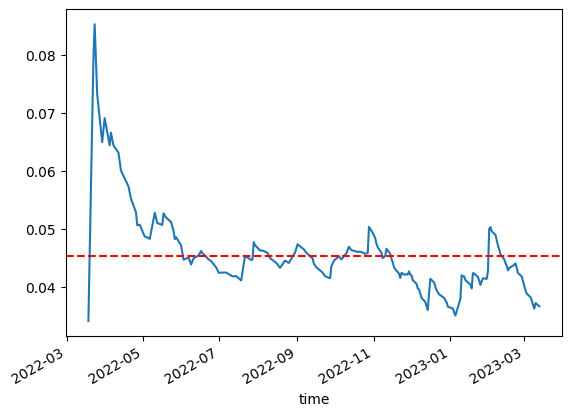

In [9]:
# show volitility over time

f,ax=plt.subplots()
dailyVolitility.plot(ax=ax)
ax.axhline(dailyVolitility.mean(),ls='--',color='r')

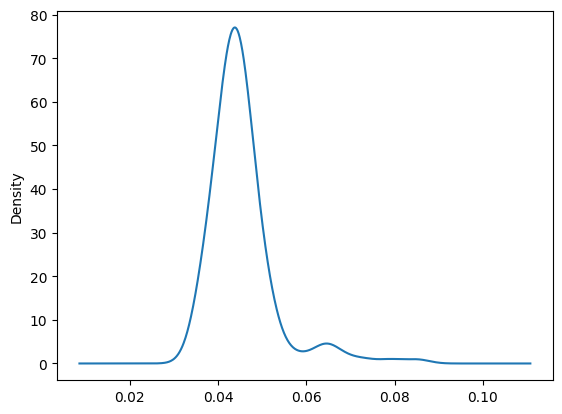

In [10]:
#show distribution of volitility
ax = dailyVolitility.plot.kde()

In [11]:
tEvents = flt.getTEvents(ans.close,h=dailyVolitility.mean())
tEvents

DatetimeIndex(['2022-03-17 08:00:00', '2022-03-18 08:00:00',
               '2022-03-22 08:00:00', '2022-03-23 08:00:00',
               '2022-03-25 08:00:00', '2022-03-29 08:00:00',
               '2022-03-31 08:00:00', '2022-04-04 08:00:00',
               '2022-04-05 08:00:00', '2022-04-07 08:00:00',
               ...
               '2023-02-28 08:00:00', '2023-03-01 08:00:00',
               '2023-03-02 08:00:00', '2023-03-03 08:00:00',
               '2023-03-06 08:00:00', '2023-03-07 08:00:00',
               '2023-03-08 08:00:00', '2023-03-09 08:00:00',
               '2023-03-10 08:00:00', '2023-03-13 08:00:00'],
              dtype='datetime64[ns]', length=156, freq=None)

4. Add vertical barrier

In [12]:
t1 = addVerticalBarrier(tEvents, close, numDays=1)
t1

5. Apply Triple Barrier method where ptSl = [2,1]  (2 to 1 profit ratio)

In [13]:
#to do

6. Generate label using getBins

In [14]:
#to do

7. Drop underpopulated labels (snippet 3.8)

In [15]:
#to do 

8. Adjust getBins to 0 if vertical barrier is touched first

In [16]:
#to do

9. Apply strategy here to suggest the side, not the bet
    
    9.1 Trendlabeling

    9.2 Mean Reverting BB 

In [17]:
#to do

10. Train model to decide trade or not trade since step 9 already decided a side (up or down)

    10.1 Random Forest

    10.2 SVC

In [18]:
#to do

11. Compare model with or without Secondary Model

In [19]:
# to do